# 1.Data Sourcing/Mining

In [1]:
#importing necesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('../data/handm.csv')

# displays the first 5 rows of the dataset
df.head()


,Unnamed: 0,productId,productName,brandName,url,price,stockState,comingSoon,colorName,isOnline,colors,colorShades,newArrival,mainCatCode,details,materials
0,0,834333001,Derby Shoes,H&M,https://www2.hm.com/en_us/productpage.08343330...,49.99,Available,False,Black,True,272628,Charcoal,False,men_shoes_dressed,Derby shoes with open lacing at front. Canvas ...,COMPOSITION\r\nSole:Thermoplastic rubber 100%\...
1,1,1258600003,Pile-Lined Slippers,H&M,https://www2.hm.com/en_us/productpage.12586000...,24.99,Available,False,Black,True,272628,Charcoal,False,men_shoes_slippers,Slippers in napped fabric. Decorative seam at ...,COMPOSITION\r\nLining:Polyester 100%\r\nUpper:...
2,2,1036812001,Derby Shoes,H&M,https://www2.hm.com/en_us/productpage.10368120...,56.99,Available,False,Black,True,272628,Charcoal,False,men_shoes_dressed,Derby shoes in soft faux suede with open lacin...,COMPOSITION\r\nLining and insole:Cotton 100%\r...
3,3,1112924002,Fleece-lined Slippers,H&M,https://www2.hm.com/en_us/productpage.11129240...,29.99,Available,False,Dark blue,True,393B47,Bright blue|Cobalt blue|Dark blue|Indigo|Navy ...,False,men_shoes_slippers,Slippers in woven fabric with a moccasin seam ...,COMPOSITION\r\nLining:Polyester 100%\r\nUpper:...
4,4,1119476020,Sneakers,H&M,https://www2.hm.com/en_us/productpage.11194760...,29.99,Available,False,White,True,FFFFFF,NaN,False,men_shoes_sneakers,"Sneakers with a padded upper edge and tongue, ...",COMPOSITION\r\nLining:Polyester 100%\r\nUpper:...


# 2. DATA PREPERATION

In [4]:
#displays the number of rows and columns in the dataset
df.shape

(9677, 16)

In [5]:
# displays the columns in the dataset
df.describe()

,Unnamed: 0,productId,price
count,9677.000000,9.677000e+03,9677.000000
mean,4838.000000,1.188702e+09,34.215088
std,2793.653611,1.206040e+08,28.262665
min,0.000000,1.077270e+08,3.990000
25%,2419.000000,1.198945e+09,18.990000
50%,4838.000000,1.230524e+09,29.990000
75%,7257.000000,1.244770e+09,39.990000
max,9676.000000,1.280785e+09,469.000000


In [6]:
# displays the data types of the columns in the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   9677 non-null   int64  
 1   productId    9677 non-null   int64  
 2   productName  9677 non-null   object 
 3   brandName    9677 non-null   object 
 4   url          9677 non-null   object 
 5   price        9677 non-null   float64
 6   stockState   9677 non-null   object 
 7   comingSoon   9677 non-null   bool   
 8   colorName    9677 non-null   object 
 9   isOnline     9677 non-null   bool   
 10  colors       9677 non-null   object 
 11  colorShades  6511 non-null   object 
 12  newArrival   9677 non-null   bool   
 13  mainCatCode  9677 non-null   object 
 14  details      9676 non-null   object 
 15  materials    9518 non-null   object 
dtypes: bool(3), float64(1), int64(2), object(10)
memory usage: 1011.3+ KB
None


In [7]:
# checks data types of each column
print(df.dtypes)

Unnamed: 0       int64
productId        int64
productName     object
brandName       object
url             object
price          float64
stockState      object
comingSoon        bool
colorName       object
isOnline          bool
colors          object
colorShades     object
newArrival        bool
mainCatCode     object
details         object
materials       object
dtype: object


# 3. DATA CLEANING

In cell below I group data into `numeric_df` for numeric values and `categorical_df` for object values for efficient cleaning.

Select all numeric values and store them on a variable `numeric_df`

In [8]:
# selet numerical columns

numeric_df = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_df

['Unnamed: 0', 'productId', 'price']

Cell above output 3 columns which contains numeric values.

In cell below I check for **missing values** in numeric values

In [9]:
# check for missing values in numeric_df

(df[numeric_df].isna().sum() / len(df[numeric_df])) * 100 # displays the percentage of missing values in each column

Unnamed: 0    0.0
productId     0.0
price         0.0
dtype: float64

Cell above shows all numeric_df columns has no missing values.

In cell below I check for duplicates in numeric_df

In [12]:
# check for duplicates in the dataset
df[numeric_df].duplicated().sum() # displays the number of duplicate rows in the dataset

np.int64(0)

No duplicates contained in numeric_df

Next maybe check for **outliers, data types format etc**

Below I select **categorical values in df** and store them under variable **categorical_df** for efficient cleaning.

In [15]:
# select categorical columns

categorical_df = df.select_dtypes(include=[np.object_]).columns.tolist()
categorical_df

['productName',
 'brandName',
 'url',
 'stockState',
 'colorName',
 'colors',
 'colorShades',
 'mainCatCode',
 'details',
 'materials']

Cell above select all categorical coumns in df dataset for efficient cleaning of dataset.

In cell below I check for missing values.

In [16]:
# checks for null values in categorical_df
(df[categorical_df].isna().sum() / len(df[categorical_df])) * 100 # displays the percentage of missing values in each column
# check for duplicates in the dataset

productName     0.000000
brandName       0.000000
url             0.000000
stockState      0.000000
colorName       0.000000
colors          0.000000
colorShades    32.716751
mainCatCode     0.000000
details         0.010334
materials       1.643071
dtype: float64

The cell above checks for missing values and three columns containes null values **colorShades**, **materials** & **details**.

Cell below I will impute for the missing values in specified columns using **mode**.

In [20]:
# impute missing values in categorical_df with mode

df['colorShades'] = df['colorShades'].fillna(df['colorShades'].mode()[0])
df['materials'] = df['materials'].fillna(df['materials'].mode()[0])
df['details'] = df['details'].fillna(df['details'].mode()[0])

In [21]:
# check if missing values have been imputed
df[categorical_df].isna().sum() / len(df[categorical_df]) # displays the percentage of missing values in each column

productName    0.0
brandName      0.0
url            0.0
stockState     0.0
colorName      0.0
colors         0.0
colorShades    0.0
mainCatCode    0.0
details        0.0
materials      0.0
dtype: float64

The cell above shows that all missing values have been imputed successfully

Below I check for duplicates in categorical_df

In [24]:
# check for duplicates in categorical_df
df[categorical_df].duplicated().sum() # displays the number of duplicate rows in the dataset

np.int64(1153)

Cell above shows there are several duplicates but basesd on the original dataset shows each productid which identfies product with unique values so no need to drop them for now

In [25]:
# check info() again to check if missing values have been imputed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   9677 non-null   int64  
 1   productId    9677 non-null   int64  
 2   productName  9677 non-null   object 
 3   brandName    9677 non-null   object 
 4   url          9677 non-null   object 
 5   price        9677 non-null   float64
 6   stockState   9677 non-null   object 
 7   comingSoon   9677 non-null   bool   
 8   colorName    9677 non-null   object 
 9   isOnline     9677 non-null   bool   
 10  colors       9677 non-null   object 
 11  colorShades  9677 non-null   object 
 12  newArrival   9677 non-null   bool   
 13  mainCatCode  9677 non-null   object 
 14  details      9677 non-null   object 
 15  materials    9677 non-null   object 
dtypes: bool(3), float64(1), int64(2), object(10)
memory usage: 1011.3+ KB


In [26]:
# check for shape of the dataset again
df.shape

(9677, 16)

In [27]:
# save the cleaned dataset to a new csv file for tableau analysis
df.to_csv('../data/cleaned_handm.csv', index=False)

# 4. DATA VISUALUZATION

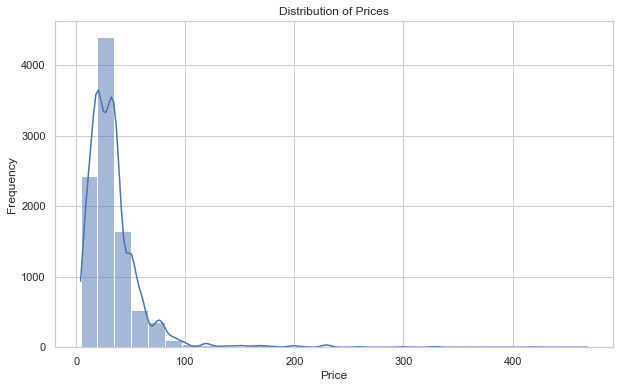

In [45]:
# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Histogram of a numerical column (e.g., 'price')
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

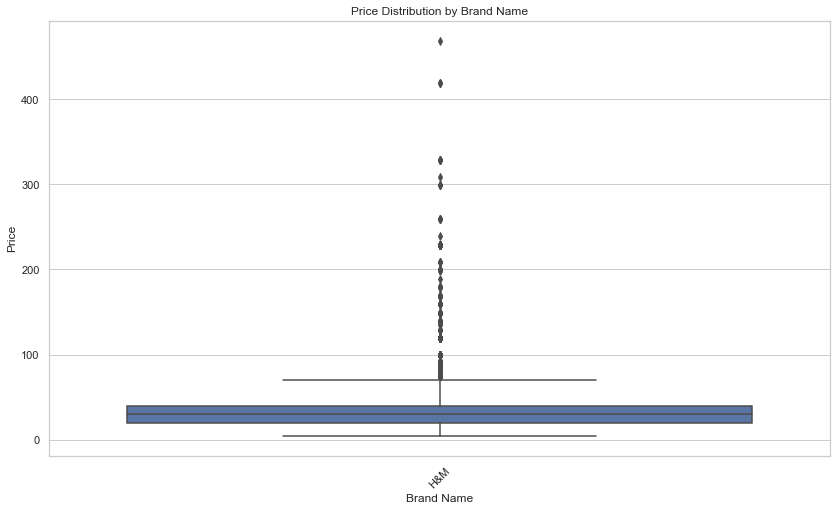

In [ ]:
# 2. Box plot of 'price' by 'brandName'
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_copy, x='brandName', y='price')
plt.title('Price Distribution by Brand Name')
plt.xlabel('Brand Name')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

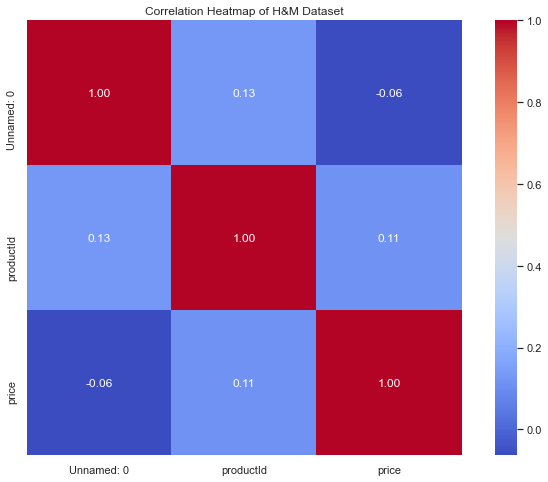

In [66]:
# 3. Heatmap of correlations between numerical features

# Select numerical columns for correlation analysis
numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

#  correlation matrix calculation
correlation_matrix = df_clean[numerical_cols].corr()

# matplotlib figure
plt.figure(figsize=(12, 8))

#  heatmap creation
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Set the title
plt.title('Correlation Heatmap of H&M Dataset')

# Show the plot
plt.show()

# 5. DATA MODELLING

In [61]:
import sqlite3

# Establish a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Execute SQL statements to create tables
cursor.execute("""
CREATE TABLE Brand (
    BrandID INTEGER PRIMARY KEY,
    BrandName TEXT NOT NULL
);
""")

cursor.execute("""
CREATE TABLE Category (
    CategoryID INTEGER PRIMARY KEY,
    CategoryName TEXT NOT NULL
);
""")

cursor.execute("""
CREATE TABLE Product (
    ProductID INTEGER PRIMARY KEY,
    ProductName TEXT NOT NULL,
    BrandID INTEGER,
    CategoryID INTEGER,
    Price REAL,
    Color TEXT,
    Size TEXT,
    StockQuantity INTEGER,
    FOREIGN KEY (BrandID) REFERENCES Brand(BrandID),
    FOREIGN KEY (CategoryID) REFERENCES Category(CategoryID)
);
""")

cursor.execute("""
CREATE TABLE Customer (
    CustomerID INTEGER PRIMARY KEY,
    Name TEXT NOT NULL,
    Email TEXT NOT NULL UNIQUE,
    Gender TEXT,
    Age INTEGER,
    MembershipStatus TEXT
);
""")

cursor.execute("""
CREATE TABLE Orders (  -- Changed from Order to Orders
    OrderID INTEGER PRIMARY KEY,
    CustomerID INTEGER,
    OrderDate DATETIME,
    TotalAmount REAL,
    PaymentMethod TEXT,
    FOREIGN KEY (CustomerID) REFERENCES Customer(CustomerID)
);
""")

cursor.execute("""
CREATE TABLE OrderDetails (
    OrderID INTEGER,
    ProductID INTEGER,
    Quantity INTEGER,
    Price REAL,
    FOREIGN KEY (OrderID) REFERENCES Orders(OrderID),  -- Updated to match the new table name
    FOREIGN KEY (ProductID) REFERENCES Product(ProductID)
);
""")

# Commit changes and close the connection
conn.commit()
conn.close()

In [67]:
# Save the DataFrame to a CSV file
df_clean.to_csv('H&M_Analysis_Data_cleaned.csv')